## For 1D

### Import PAckages

In [51]:
import GPyOpt
import GPy
import numpy as np
import matplotlib.pyplot as plt


In [52]:
# Define the 1D function you want to optimize (you can replace this with your own function)
def objective_function(x):
    return x**2 + np.sin(2*x)

In [53]:

# Define the bounds of the optimization space
bounds = [{'name': 'x', 'type': 'continuous', 'domain': (-5, 5)}]

# Define the Matérn kernel with specified parameters using GPy
kernel = GPy.kern.Matern52(input_dim=1, variance=1.0, lengthscale=1.0)

# Initialize the optimization problem with the defined kernel
optimizer = GPyOpt.methods.BayesianOptimization(f=objective_function, domain=bounds, kernel=kernel)

# Run the optimization loop
max_iter = 20
optimizer.run_optimization(max_iter=max_iter)

In [57]:
print("Optimization finished after", max_iter, "iterations.")
print("Best found solution:")
print("x:", optimizer.x_opt)
print("f(x):", optimizer.fx_opt)

Optimization finished after 20 iterations.
Best found solution:
x: [-0.49798082]
f(x): -0.5912972967246609


### Ploting

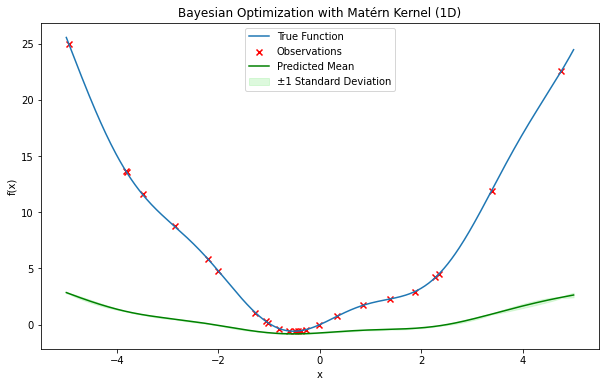

In [54]:
x_vals = np.linspace(-5, 5, 400).reshape(-1, 1)
y_vals = objective_function(x_vals)
y_pred, y_var = optimizer.model.predict(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='True Function')
plt.scatter(optimizer.X, optimizer.Y, color='red', marker='x', label='Observations')
plt.plot(x_vals, y_pred, color='green', label='Predicted Mean')
plt.fill_between(x_vals.flatten(), y_pred.flatten() - np.sqrt(y_var).flatten(), y_pred.flatten() + np.sqrt(y_var).flatten(), color='lightgreen', alpha=0.3, label='±1 Standard Deviation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Bayesian Optimization with Matérn Kernel (1D)')
plt.legend()
plt.show()


## For 2D

### Objective Function

In [39]:
def objective_function(x):
    x = np.array(x)  # Convert x to a NumPy array
    return (x**2).sum()

### Bounds

In [40]:
bounds = [{'name': 'x1', 'type': 'continuous', 'domain': (-5, 5)},
          {'name': 'x2', 'type': 'continuous', 'domain': (-5, 5)}]


In [41]:
# Define the Matérn kernel with specified parameters using GPy
kernel = GPy.kern.Matern52(input_dim=2, variance=1.0, lengthscale=1.0)

# Initialize the optimization problem with the defined kernel
optimizer = GPyOpt.methods.BayesianOptimization(f=objective_function, domain=bounds, kernel=kernel)

In [56]:
max_iter = 20
optimizer.run_optimization(max_iter=max_iter)


print("Optimization finished after", max_iter, "iterations.")
print("Best found solution:")
print("x:", optimizer.x_opt)
print("f(x):", optimizer.fx_opt)

Optimization finished after 20 iterations.
Best found solution:
x: [-0.49798082]
f(x): -0.5912972967246609


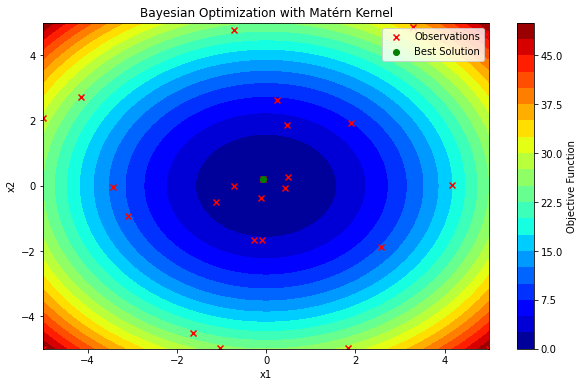

In [44]:
# Plot the optimization process
x1_vals = np.linspace(-5, 5, 100)
x2_vals = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Y = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Y[i, j] = objective_function([X1[i, j], X2[i, j]])

plt.figure(figsize=(10, 6))
plt.contourf(X1, X2, Y, levels=20, cmap='jet')
plt.colorbar(label='Objective Function')
plt.scatter(optimizer.X[:, 0], optimizer.X[:, 1], color='red', marker='x', label='Observations')
plt.scatter(optimizer.x_opt[0], optimizer.x_opt[1], color='green', marker='o', label='Best Solution')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Bayesian Optimization with Matérn Kernel')
plt.legend()
plt.show()